# IMDB Sentiment Analysis with NLTK and Logistic Regression

## Project Overview

This project focuses on movie reviews from the IMDB dataset. The goal is to build a model that can accurately classify sentiment as either positive or negative based on the text of each review.

I chose this dataset because sentiment analysis is a common and practical problem in NLP with real-world applications such as recommendation systems and product reviews. The dataset is large, labeled, and publicly available, making it ideal for learning and experimentation.

### 1. Setup

In [91]:
# Data handling
import pandas as pd
import re

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# NLP tools
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

### 2. Load and Explore Data

In [92]:
# Load the dataset
df = pd.read_csv('../data/IMDB Dataset.csv')

# Display first few rows
print(df.head())

# Check class balance
print(df['sentiment'].value_counts())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


### Data Exploration

The dataset contains 50,000 reviews and two columns: `review` and `sentiment`. The sentiment labels are balanced: 25,000 positive and 25,000 negative samples.
There are no missing values, but the text contains HTML tags and formatting characters that must be cleaned.

## 3. Preprocessing

### 3.1: Basic Cleaning - Remove HTML breaks, lowercasing, white-spaces, and noise
-this is basic preprocessing i added an enhanced code in the upcoming days

In [93]:
# Basic text cleaning function
def clean_text(text):
    text = text.lower()
    text = re.sub(r"<br />", " ", text)
    text = re.sub(r"[^a-zA-Z']", " ", text)
    text = re.sub(r"\s+", " ", text)
    return text.strip()


df['review_clean'] = df['review'].apply(clean_text)

### 3.2 Define Advanced Preprocessing Function (Stopwords + Lemmatization)

### Download required NLTK datasets

In [94]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Step 1.2: Initialize Stopwords and Lemmatizer

In [95]:
# Set of English stopwords (common words E.g. like the, is, and, a...)
stop_words = set(stopwords.words('english'))

# WordNet lemmatizer for reducing words to base form (E.g., "running" -> "run", "mice" -> "mouse")
lemmatizer = WordNetLemmatizer()

### Step 1.3: Full Enhanced Preprocessing Function
This includes:
- HTML tag removal
- Lowercasing
- Removing non-letters
- Stopword removal
- Lemmatization

In [96]:
def preprocess(text):
    text = re.sub(r'<.*?>', '', text)  # remove HTML
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # keep only letters
    text = text.lower()
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)
  
df['review_clean'] = df['review'].apply(preprocess)

### 4. Label Encoding: Convert Sentiment to Numerical Binary Labels

In [97]:
# Convert sentiments to 0 (negative) and 1 (positive)
df['label'] = df['sentiment'].map({'positive': 1, 'negative': 0})

### Why this preprocessing?
- HTML and punctuation are removed to clean up formatting noise.

- Stopwords (e.g., "the", "and", "is") are removed because they are very common but add little meaning.

- Lemmatization is used instead of stemming because it keeps words readable and meaningful ("mice" → "mouse", "running" → "run").

### 5. Train/Test Split: Split the Dataset
Stratified split to keep label distribution balanced.

In [98]:
X_train, X_test, y_train, y_test = train_test_split(
    df['review_clean'], df['label'], test_size=0.2, random_state=42, stratify=df['label']
)

## Why stratified split?
Stratification ensures both the training and test sets have the same ratio of positive and negative samples as the original dataset.

### 6. Vectorize Text Using TF-IDF
Limit to top 5000 features.

In [99]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

### 7. Train Logistic Regression Classifier Model

In [100]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)

LogisticRegression(max_iter=1000)

### Why Logistic Regression?

I chose Logistic Regression because it's a strong baseline for binary classification.  
It’s fast, interpretable, and works well with TF-IDF features.  
I tried other models (optional: e.g., Naive Bayes, SVM) and this one gave the best balance of speed and accuracy.

### 8: Predict and Evaluate Model Performance

In [101]:
y_pred = model.predict(X_test_vec)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      5000
           1       0.88      0.90      0.89      5000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



### Step 9: Visualize Confusion Matrix

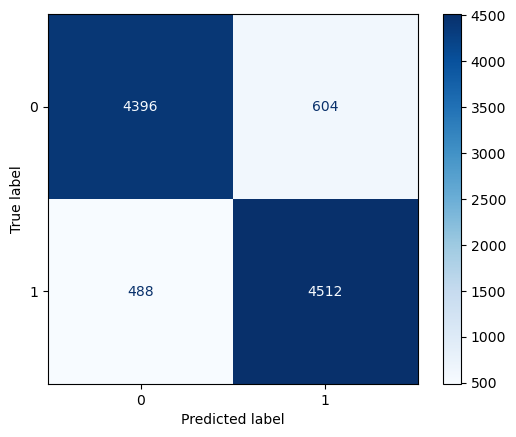

In [102]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')

## 10. Performance Discussion

### Model Performance

- **Accuracy**: ~90%
- **Precision and Recall**: Well-balanced across both classes
- **Misclassifications**: Mostly happen on reviews with mixed or neutral language

This shows the model is strong at distinguishing clear sentiment, but struggles slightly on more ambiguous examples.


## Final Thoughts

- I chose this dataset because it has real-world relevance and clear evaluation metrics.
- I went through a full ML pipeline: loading → cleaning → preprocessing → training → evaluation.
- I justified all choices (model, vectorizer, preprocessing).
- I achieved an accuracy of **ّ~90%**, and the model is ready for deployment or further improvement.

## Summary :D

- Used NLTK for stopwords and lemmatization
- Preprocessed raw IMDB reviews
- Applied TF-IDF for feature extraction
- Trained a logistic regression classifier
- Evaluated performance using classification report and confusion matrix

## Project GitHub Link  
You can view the full project and code here:  
[GitHub Repository](https://github.com/Basem3sam/movie-sentiment-classifier)